In [115]:
import pandas as pd
from ast import literal_eval
import json
import numpy as np

In [5]:
dataset_df = pd.read_csv('data.csv',encoding="utf-8",converters={"tags":literal_eval})
dataset_df

,Unnamed: 0,name,steam_appid,release_date,is_free,required_age,rate,price,owners,tags
0,0,Dota 2,570,2013,True,0,0.829342,0,350000000,"[Free to Play, MOBA, Multiplayer, Strategy, e-..."
1,1,Counter-Strike: Global Offensive,730,2012,True,0,0.882848,0,75000000,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
2,2,New World,1063730,2021,False,0,0.680567,3999,75000000,"[Massively Multiplayer, Open World, MMORPG, RP..."
3,3,Team Fortress 2,440,2007,True,0,0.936167,0,75000000,"[Free to Play, Hero Shooter, Multiplayer, FPS,..."
4,4,Apex Legends™,1172470,2020,True,0,0.858303,0,75000000,"[Free to Play, Multiplayer, Battle Royale, Sho..."
...,...,...,...,...,...,...,...,...,...,...
48858,48858,VEHICLES FURY,749290,2017,False,0,0.166667,1499,10000,"[Action, Indie, Racing, Sports]"
48859,48859,Crawler,1506770,2021,False,0,0.416667,399,10000,"[Adventure, Action RPG, Exploration, Dungeon C..."
48860,48860,Coins Collector Simulator,1868280,2022,False,0,0.625000,499,10000,"[Casual, Racing, Simulation, Sports, Strategy,..."
48861,48861,You Arrive in a Town,1466190,2021,False,0,0.473684,499,10000,"[Indie, Action, Casual, RPG, Action RPG, Arcad..."


In [3]:
'''
dictionary
key: year
val: dictionary mapping tag to number
'''
year_tag_dict = {}
for index, row in dataset_df.iterrows():
    year = row["release_date"]
    tags = row["tags"]
    if year in year_tag_dict:
        tag_count_dict = year_tag_dict[year]
        for tag in tags:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1
    else:
        year_tag_dict[year] = {}
        for tag in tags:
            year_tag_dict[year][tag] = 1

## Parse data for visualization 1, force directed graph of tags

In [55]:
tag_name = {}
for i,row in dataset_df.iterrows():
    tags = row["tags"]
    for tag in tags:
        if tag not in tag_name:
            tag_name[tag] = 1
        else:
            tag_name[tag] += 1

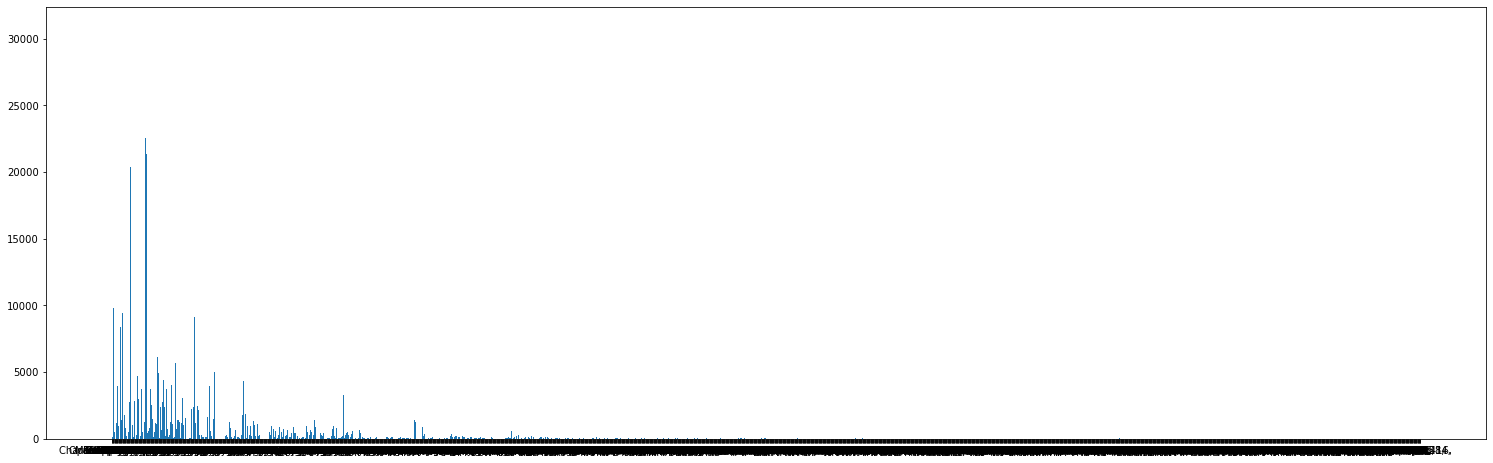

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
langs = tag_name.keys()
students = tag_name.values()
ax.bar(langs,students)
plt.show()

In [238]:
threshold = 1000
drop_num = 0
tag_use = []
for key in tag_name.keys():
    if tag_name[key] <= threshold:
        drop_num +=1
    else:
        tag_use.append(key)

In [239]:
print(drop_num)
print(len(tag_use))
print(tag_use)

2163
130
['Free to Play', 'Multiplayer', 'Strategy', 'Action', 'Online Co-Op', 'PvP', 'Difficult', 'Co-op', 'Fantasy', 'RPG', 'Character Customization', 'Replay Value', 'Action RPG', 'Simulation', 'FPS', 'Shooter', 'Tactical', 'First-Person', 'War', 'Realistic', 'Fast-Paced', 'Massively Multiplayer', 'Open World', 'Adventure', 'PvE', 'Walking Simulator', 'Crafting', 'Third Person', 'Sandbox', 'Violent', 'Sexual Content', 'Funny', 'Cartoony', 'Comedy', 'Cartoon', 'Survival', 'Sci-fi', 'Zombies', 'Singleplayer', 'Indie', 'Casual', 'Atmospheric', 'Mature', 'Racing', 'Great Soundtrack', 'Horror', 'Gore', 'Survival Horror', 'Local Co-Op', 'Space', 'Hack and Slash', 'Isometric', '2D', 'Pixel Graphics', 'Building', 'Exploration', 'Platformer', 'Physics', '2D Platformer', 'Local Multiplayer', 'Family Friendly', 'Controller', 'Combat', 'VR', 'Historical', 'Relaxing', 'Dark Fantasy', '3D', 'Colorful', 'Top-Down', 'Short', 'Classic', 'Futuristic', 'Story Rich', 'Dungeon Crawler', 'Point & Click',

In [251]:
length = len(tag_use)
matrix = [[0 for i in range(length)] for i in range(length)]
for i, row in dataset_df.iterrows():
    tags = row["tags"]
    for idx, tag in enumerate(tags):
        if tag in tag_use:
            for i in range(idx+1,len(tags)):
                if tags[i] in tag_use:
                    idx1 = tag_use.index(tag)
                    idx2 = tag_use.index(tags[i])
                    matrix[idx1][idx2] += 1

In [252]:
maxi = np.amax(matrix)
for i in range(length):
    for j in range(length):
        matrix[i][j] = matrix[i][j]/maxi * 50

In [259]:
'''
GOAL: json
{
    "nodes": [{"id": "tagname1", "group": 1}],
    "links": [{"source": "tagname1", "target": "tagname2", "value": co-occurance}]
}
'''
links = []
for i in range(length):
    for j in range(length):
        if i == j: continue
        if matrix[i][j] < 5:continue
        val = {"source":tag_use[i],"target":tag_use[j],"value":matrix[i][j]}
        links.append(val)

In [260]:
nodes = []
for i, tag in enumerate(tag_use):
    val = {"id": tag, "group": i+1}
    nodes.append(val)

In [261]:
vis1_dict = {"nodes":nodes,"links":links}
# Serializing json
json_object = json.dumps(vis1_dict, indent=4)
 
# Writing to sample.json
with open("visualization/vis1.json", "w") as outfile:
    outfile.write(json_object)